# 06. Feature Engineering

### Importando as bibliotecas

In [1]:
import sys
sys.path.append('..')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import functions.fn_stats as fn_stats
import functions.fn_charts as fn_charts
import params.consts as consts
from sklearn.preprocessing import (OneHotEncoder, StandardScaler, MinMaxScaler, PowerTransformer,)
from sklearn.compose import ColumnTransformer

### Lendo o dataset tratado e visualizando o overview atual

In [2]:
df = pd.read_csv(consts.LEAN_DATASET) # Armazenando o dataset tratado em uma variável

df # Exbindo uma visão geral do dataset

,Education,Marital_Status,Children,HasChildren,Age,AgeGroup,Income,Recency,Complain,Days_Since_Enrolled,Years_Since_Enrolled,NumDealsPurchases,NumWebVisitsMonth,NumTotalPurchases,MntRegularProds,MntGoldProds,MntTotal,AcceptedCmpTotal,HasAcceptedCmp,Response
0,Graduation,Single,0,0,57,46-60,58138.0,58,0,663,1,3,7,22,1529,88,1617,0,0,1
1,Graduation,Single,2,1,60,46-60,46344.0,38,0,113,0,2,5,4,21,6,27,0,0,0
2,Graduation,Partner,0,0,49,46-60,71613.0,26,0,312,0,1,4,20,734,42,776,0,0,0
3,Graduation,Partner,1,1,30,18-30,26646.0,26,0,139,0,2,6,6,48,5,53,0,0,0
4,PhD,Partner,1,1,33,31-45,58293.0,94,0,161,0,5,5,14,407,15,422,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,Graduation,Partner,1,1,47,46-60,61223.0,46,0,381,1,2,5,16,1094,247,1341,0,0,0
2201,PhD,Partner,3,1,68,61+,64014.0,56,0,19,0,7,7,15,436,8,444,1,1,0
2202,Graduation,Single,0,0,33,31-45,56981.0,91,0,155,0,1,6,18,1217,24,1241,1,1,0
2203,Master,Partner,1,1,58,46-60,69245.0,8,0,156,0,2,3,21,782,61,843,0,0,0


In [3]:
df.info() # Exibindo as informações das variáveis do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Education             2205 non-null   object 
 1   Marital_Status        2205 non-null   object 
 2   Children              2205 non-null   int64  
 3   HasChildren           2205 non-null   int64  
 4   Age                   2205 non-null   int64  
 5   AgeGroup              2205 non-null   object 
 6   Income                2205 non-null   float64
 7   Recency               2205 non-null   int64  
 8   Complain              2205 non-null   int64  
 9   Days_Since_Enrolled   2205 non-null   int64  
 10  Years_Since_Enrolled  2205 non-null   int64  
 11  NumDealsPurchases     2205 non-null   int64  
 12  NumWebVisitsMonth     2205 non-null   int64  
 13  NumTotalPurchases     2205 non-null   int64  
 14  MntRegularProds       2205 non-null   int64  
 15  MntGoldProds         

In [4]:
fn_stats.describe(df) # Usando a função que exibe as estatísticas das colunas numéricas

,Children,HasChildren,Age,Income,Recency,Complain,Days_Since_Enrolled,Years_Since_Enrolled,NumDealsPurchases,NumWebVisitsMonth,NumTotalPurchases,MntRegularProds,MntGoldProds,MntTotal,AcceptedCmpTotal,HasAcceptedCmp,Response
count,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00
mean,0.95,0.72,45.10,51622.09,49.01,0.01,353.72,0.48,2.32,5.34,12.57,562.76,44.06,606.82,0.30,0.21,0.15
std,0.75,0.45,11.71,20713.06,28.93,0.09,202.56,0.50,1.89,2.41,7.18,575.94,51.74,601.68,0.68,0.41,0.36
min,0.00,0.00,18.00,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,0.00,5.00,0.00,0.00,0.00
25%,0.00,0.00,37.00,35196.00,24.00,0.00,180.00,0.00,1.00,3.00,6.00,56.00,9.00,69.00,0.00,0.00,0.00
50%,1.00,1.00,44.00,51287.00,49.00,0.00,356.00,0.00,2.00,6.00,12.00,343.00,25.00,397.00,0.00,0.00,0.00
75%,1.00,1.00,55.00,68281.00,74.00,0.00,529.00,1.00,3.00,7.00,18.00,964.00,56.00,1047.00,0.00,0.00,0.00
max,3.00,1.00,74.00,113734.00,99.00,1.00,699.00,1.00,15.00,20.00,32.00,2491.00,321.00,2525.00,4.00,1.00,1.00


In [5]:
df.describe(exclude='number') # Exibindo as estatísticas das colunas categóricas

,Education,Marital_Status,AgeGroup
count,2205,2205,2205
unique,5,2,4
top,Graduation,Partner,31-45
freq,1113,1422,958


In [6]:
df.isnull().sum() # Somando todos os valores nulos de cada coluna

Education               0
Marital_Status          0
Children                0
HasChildren             0
Age                     0
AgeGroup                0
Income                  0
Recency                 0
Complain                0
Days_Since_Enrolled     0
Years_Since_Enrolled    0
NumDealsPurchases       0
NumWebVisitsMonth       0
NumTotalPurchases       0
MntRegularProds         0
MntGoldProds            0
MntTotal                0
AcceptedCmpTotal        0
HasAcceptedCmp          0
Response                0
dtype: int64

### Listando as variáveis numéricas e categóricas

In [7]:
numerical_features = df.select_dtypes(include='number').columns # Armazenando as features numéricas em uma variável
categorical_features = df.select_dtypes(exclude='number').columns # Armazenando as features categóricas em uma variável

print('- Numerical Features:') # Printando as variávei numéricas
for feature in numerical_features:
    print(feature)

print('\n- Categorical Features:') # Printando as variávei categóricas
for feature in categorical_features:
    print(feature)

- Numerical Features:
Children
HasChildren
Age
Income
Recency
Complain
Days_Since_Enrolled
Years_Since_Enrolled
NumDealsPurchases
NumWebVisitsMonth
NumTotalPurchases
MntRegularProds
MntGoldProds
MntTotal
AcceptedCmpTotal
HasAcceptedCmp
Response

- Categorical Features:
Education
Marital_Status
AgeGroup


### Visualizando a distribuição das features em histogramas

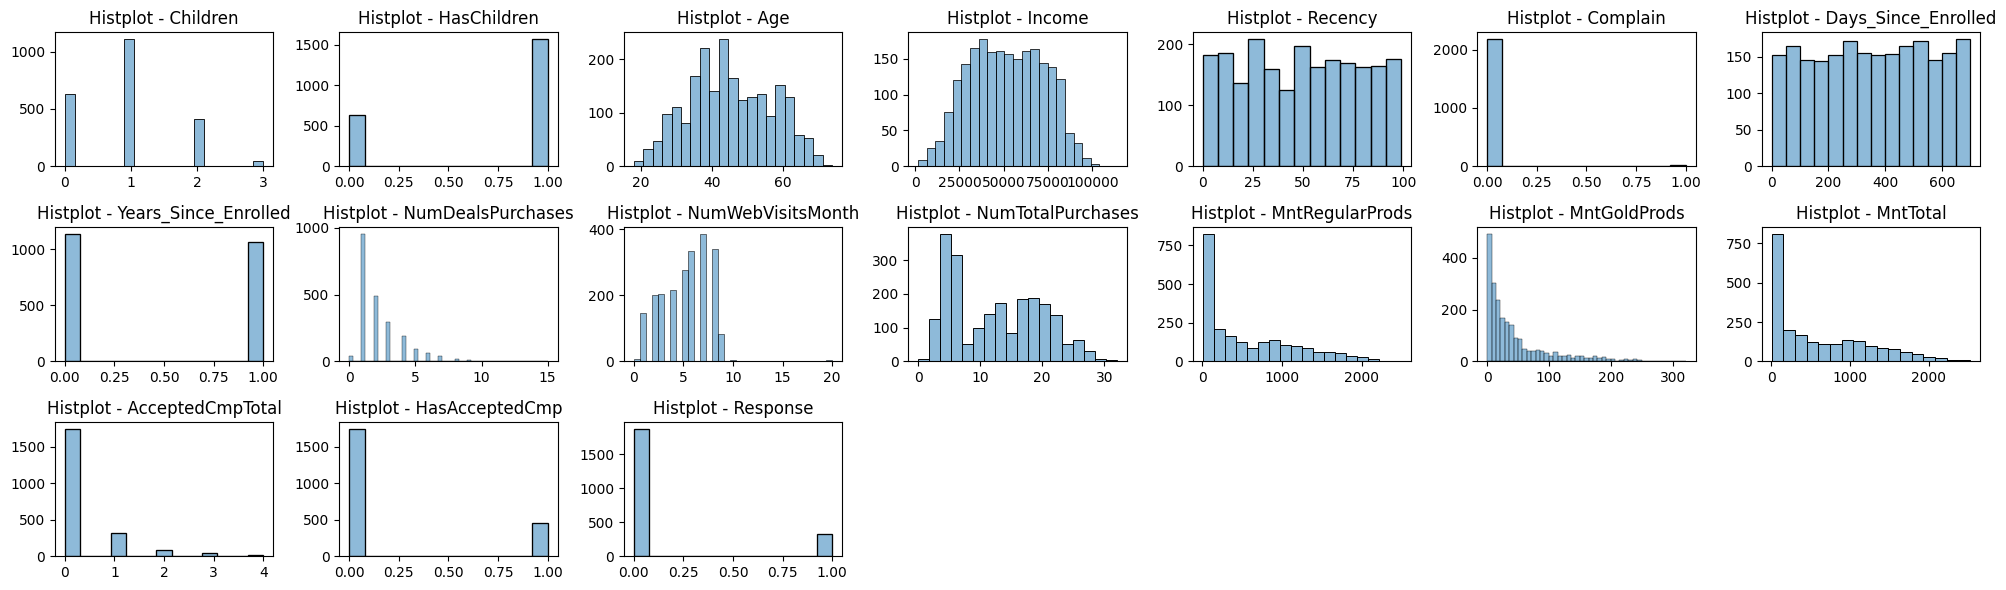

In [8]:
fn_charts.histplots(df, numerical_features, num_cols=7, height_figsize=2) # Criando os histplots para ver sua distribuição

### Definindo por qual procedimento cada feature vai passar

In [9]:
one_hot_cols = [ # Definindo as colunas que vão passar por One Hot Encoder
    'Education', # Coluna categórica
    'Marital_Status', # Coluna categórica
    'AgeGroup', # Coluna categórica
    'Children', # Coluna com inteiros discretos
    'HasChildren', # Coluna com inteiros discretos
    'Complain', # Coluna com inteiros discretos
    'Years_Since_Enrolled', # Coluna com inteiros discretos
    'AcceptedCmpTotal', # Coluna com inteiros discretos
    'HasAcceptedCmp', # Coluna com inteiros discretos
    'Response', # Coluna com inteiros discretos
]

standard_cols = [ # Definindo as colunas que vão passar por Standard Scaler
    'Income', # Coluna com distribuição semelhante à normal
    'Age', # Coluna com distribuição semelhante à normal
]

power_cols = [ # Definindo as colunas que vão passar por Power Transformation
   'NumDealsPurchases', # Coluna com assimetria dos dados
   'NumWebVisitsMonth', # Coluna com assimetria dos dados
   'NumTotalPurchases', # Coluna com assimetria dos dados
   'MntRegularProds', # Coluna com assimetria dos dados
   'MntGoldProds', # Coluna com assimetria dos dados
   'MntTotal', # Coluna com assimetria dos dados
]

min_max_cols = [ # Definindo as colunas que vão passar por Min-Max Scaler
    'Recency', # Coluna com dados com distribuição uniforme
    'Days_Since_Enrolled', # Coluna com dados com distribuição uniforme
]

### Fazendo o pré processamento das features

In [16]:
preprocessing = ColumnTransformer( # Fazendo o pré processamento das features
    [ # Passando a inicial do novo nome da coluna, o pré processamento que será aplicado e a lista de colunas para pré processamento
        ('one_hot', OneHotEncoder(), one_hot_cols), 
        ('standard', StandardScaler(), standard_cols),
        ('min_max', MinMaxScaler(feature_range=(0, 3)), min_max_cols), # Alterando o padrão da escala de 0 a 1 para 0 a 3 para ficar próximo ao padrão dos resultados encontrados mais a frente
        ('power', PowerTransformer(), power_cols),
    ]
)
preprocessing.fit_transform(df) # Aplicando o pré processamento no dataset
preprocessing.get_feature_names_out() # Visualizando o resultado do pré processamento nas features

array(['one_hot__Education_2n Cycle', 'one_hot__Education_Basic',
       'one_hot__Education_Graduation', 'one_hot__Education_Master',
       'one_hot__Education_PhD', 'one_hot__Marital_Status_Partner',
       'one_hot__Marital_Status_Single', 'one_hot__AgeGroup_18-30',
       'one_hot__AgeGroup_31-45', 'one_hot__AgeGroup_46-60',
       'one_hot__AgeGroup_61+', 'one_hot__Children_0',
       'one_hot__Children_1', 'one_hot__Children_2',
       'one_hot__Children_3', 'one_hot__HasChildren_0',
       'one_hot__HasChildren_1', 'one_hot__Complain_0',
       'one_hot__Complain_1', 'one_hot__Years_Since_Enrolled_0',
       'one_hot__Years_Since_Enrolled_1', 'one_hot__AcceptedCmpTotal_0',
       'one_hot__AcceptedCmpTotal_1', 'one_hot__AcceptedCmpTotal_2',
       'one_hot__AcceptedCmpTotal_3', 'one_hot__AcceptedCmpTotal_4',
       'one_hot__HasAcceptedCmp_0', 'one_hot__HasAcceptedCmp_1',
       'one_hot__Response_0', 'one_hot__Response_1', 'standard__Income',
       'standard__Age', 'min_max__

### Criando um dataset com o resultado do pré processamento

In [17]:
df_pre_processed = pd.DataFrame( # Criando um dataset com o resultado do pré processamento
    preprocessing.fit_transform(df), # Passando os dados do dataset
    columns=preprocessing.get_feature_names_out() # Passando o nome das colunas do dataset
)

df_pre_processed.head(3) # Visualizando o dataset pré processado

,one_hot__Education_2n Cycle,one_hot__Education_Basic,one_hot__Education_Graduation,one_hot__Education_Master,one_hot__Education_PhD,one_hot__Marital_Status_Partner,one_hot__Marital_Status_Single,one_hot__AgeGroup_18-30,one_hot__AgeGroup_31-45,one_hot__AgeGroup_46-60,...,standard__Income,standard__Age,min_max__Recency,min_max__Days_Since_Enrolled,power__NumDealsPurchases,power__NumWebVisitsMonth,power__NumTotalPurchases,power__MntRegularProds,power__MntGoldProds,power__MntTotal
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.314651,1.017189,1.757576,2.845494,0.753752,0.700269,1.221174,1.310705,1.089046,1.315543
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,-0.254877,1.273530,1.151515,0.484979,0.160834,-0.108417,-1.319438,-1.453924,-0.947497,-1.447153
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.965354,0.333612,0.787879,1.339056,-0.838557,-0.527390,1.025388,0.687964,0.442997,0.658507


### Visualizando a distribuição das features em histogramas após o pré processamento

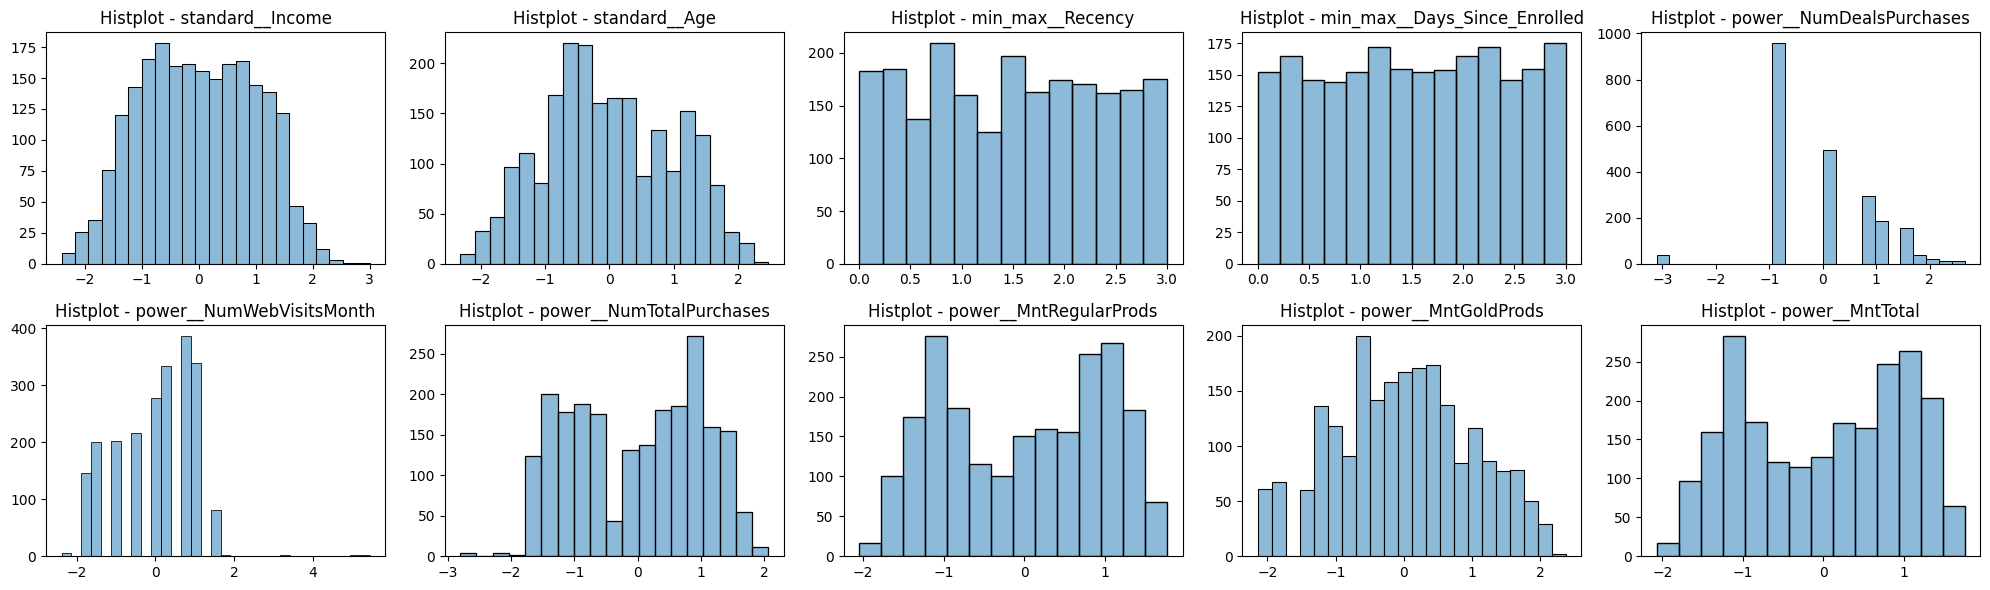

In [18]:
columns_not_one_hot = df_pre_processed.columns[~df_pre_processed.columns.str.startswith('one_hot')] # Armazenando as colunas que não começam com one_hot
fn_charts.histplots(df_pre_processed, columns_not_one_hot, num_cols=5, height_figsize=3) # Criando os histplots para ver o resultado do tratamento